In [5]:
import random
import numpy as np
import matplotlib as mpl
from scipy import random, linalg, stats
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [6]:
def plot_state(data,params):# {{{
    xparam,yparam = list(zip(*[params[idx] for idx in range(len(params)) if idx % 2==0]))
    N,nDim = len(data), len(data[0])
    x,y = list( zip(*[ list(e) for e in data]))
    rgb = [ [1,0,1] for _ in data]
    print(rgb)
    plt.scatter(x,y,facecolors=rgb)
    plt.scatter(xparam,yparam)
    plt.show()# }}}

In [7]:
def plot_softState(data,params,data_probs):# {{{
    xparam,yparam = list(zip(*[params[idx] for idx in range(len(params)) if idx % 2==0]))
    N,nDim = len(data), len(data[0])
    x,y = list( zip(*[ list(e) for e in data]))
    rgb = [ [1*obs_prob[0],1*obs_prob[1],0] for obs_prob in data_probs]
    params_rgb = [ [1,0,0],[0,1,0]]#params_rgb = [ [0,0,0] for _ in params]
    fig=plt.figure(figsize=(15,5))
    ax = fig.add_subplot(111)#221 for two figs
    ax.scatter(x,y,facecolors=rgb)
    ax.scatter(xparam,yparam,facecolors='none',edgecolors=params_rgb)
    plt.show()

In [8]:
def generate_data(n,numDim=2):# {{{
    lmbda1,lmbda2 = 30*random.rand(1,numDim)[0],30*random.rand(1,numDim)[0]
    pi1 = np.random.random()
    pi2 = 1 - pi1

    original_params = [list(lmbda1),pi1,list(lmbda2),pi2]
    data = []
    for i in range(n):
        obs_generator = np.random.random()
        if obs_generator > pi1:
            data.append(np.random.poisson(lmbda2))
        else:
            data.append(np.random.poisson(lmbda1))
    return data,original_params# }}}

In [9]:
def poisson_probability(lmbda,xi_value):# {{{
        prob = 1
        for k in range(len(lmbda)):
            probFunc = stats.poisson(lmbda[k])
            prob *= probFunc.pmf(xi_value[k])
        return prob# }}}

In [10]:
def initParameters(numDim):# {{{
    lmbda1,lmbda2 = 30*random.rand(1,numDim)[0],30*random.rand(1,numDim)[0]
    pi1 = np.random.random()
    pi2 = 1 - pi1
    return lmbda1,lmbda2,pi1,pi2# }}}

In [11]:
def sampleFromProbList(lst):
    print(lst)
    return [1,1]

def initParameterspp(numDim):# {{{
    lmbda1 = data[np.random.randint(0,len(data))]
    p_xs = []
    for obs in data:
        p_xs.append( Idiv(obs,lmbda1) )
    total_px = sum(p_xs)
    p_xs = [p_x/total_px for p_x in p_xs]
    lmbda2 = sampleFromProbList(p_xs)

    pi1 = np.random.random()
    pi2 = 1 - pi1
    return lmbda1,lmbda2,pi1,pi2# }}}

In [12]:
def softKmeans(data):# {{{
        numDim = len(data[0])
        n_iterations = 0
        max_iterations =10
        ''' Suppose our model is a mixture of 2 berns'''
        init_lmbda1,init_lmbda2,init_pi1,init_pi2,= initParameters(numDim)
        ''' e-projecao q(h|x) == P(h|x) via KL
            usando teorema de bayes temos que
            P(h|x) = [ P(x|h)*P(h) ]/P(x)
        '''

        ''' m-projecao
                    pc_h = (1/n)*sum_{i=1}_{N} [q(h|x_{i})]
                    p_h = sum_{i=1}_{N} [q(h|x_{i})*x_{i}]
                          / sum_{i=1}_{N} [ q(h|x_{i})]
                    cov_h  = { sum_{i=1}_{N} [q(h|x_{i}) * x_{i} * x_{i}_T]  / sum_{i=1}_{N} [q(h|x_{i})]}  - u*u_T
        '''
        print(originalparams)
        print("_"*75)
        while( n_iterations < max_iterations):
            if n_iterations == 0:
                last_lmbda1,last_pi1 = init_lmbda1,init_pi1
                last_lmbda2,last_pi2 = init_lmbda2,init_pi2
            else:
                last_lmbda1,last_pi1 = it_lmbda1,it_pi1
                last_lmbda2,last_pi2 = it_lmbda2,it_pi2
            it_lmbda1_numerador,it_lmbda1_denominador,it_pi1 = 0,0,0
            it_lmbda2_numerador,it_lmbda2_denominador,it_pi2 = 0,0,0
            N = len(data)
            data_probs = []
            for xi_value in data:
                #Idivsonizationn = last_pc1*np.exp(-div(xi_value,last_p1)) + last_pc2*np.exp(-div(xi_value,last_p2))
                #last_pc1*np.exp(-div(xi_value,last_p1)  )/Idivsonization'
                #last_pc2*np.exp(-div(xi_value,last_p2)  )/Idivsonization
                q_1_xi = ( poisson_probability(last_lmbda1,xi_value) * last_pi1 )/ \
                                              ( poisson_probability(last_lmbda1,xi_value) * last_pi1+ \
                                                   poisson_probability(last_lmbda2,xi_value) * last_pi2)
                q_2_xi = ( poisson_probability(last_lmbda2,xi_value) * last_pi2 )/ \
                            ( poisson_probability(last_lmbda1,xi_value) * last_pi1+ \
                                 poisson_probability(last_lmbda2,xi_value) * last_pi2)
                data_probs.append( [q_2_xi,q_1_xi] )
                it_pi1 += q_1_xi
                it_pi2 += q_2_xi
                it_lmbda1_numerador += (q_1_xi * xi_value)
                it_lmbda1_denominador += q_1_xi
                it_lmbda2_numerador += (q_2_xi * xi_value)
                it_lmbda2_denominador += q_2_xi
            it_pi1 = it_pi1/N
            it_pi2 = it_pi2/N
            it_lmbda1 = it_lmbda1_numerador/it_lmbda1_denominador
            it_lmbda2 = it_lmbda2_numerador/it_lmbda2_denominador
            print(it_pi1,it_pi2,it_lmbda1,it_lmbda2)
            plot_softState(data,originalparams,data_probs)
            n_iterations += 1
            if n_iterations == 100:
               pass
        return (it_pi1,it_pi2,it_lmbda1,it_lmbda2)# }}}

[[6.2049389138562194, 10.148872022070595], 0.31586821782668373, [19.605769517860228, 3.7497990619788411], 0.6841317821733163]
___________________________________________________________________________
0.643637872874 0.356362127126 [ 15.64175336   4.55783074] [ 17.06796171   8.18383126]


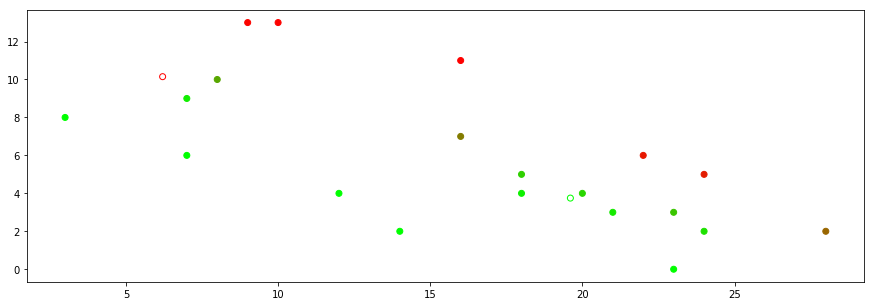

0.650201336523 0.349798663477 [ 17.66543953   4.22604024] [ 13.33312014   8.86859588]


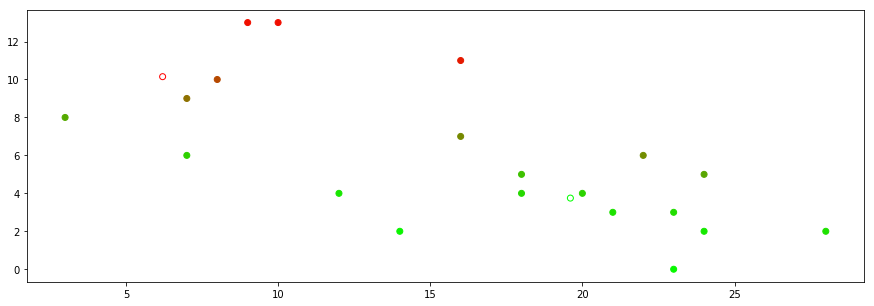

0.617398281233 0.382601718767 [ 20.27050198   3.56403333] [ 9.50081178  9.53882789]


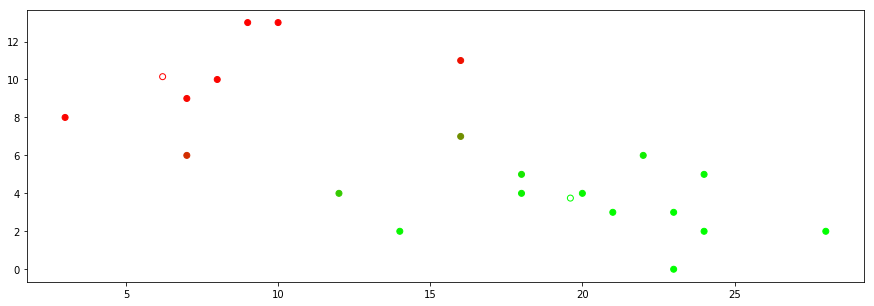

0.621729988105 0.378270011895 [ 20.51252137   3.55760688] [ 8.97969764  9.61781004]


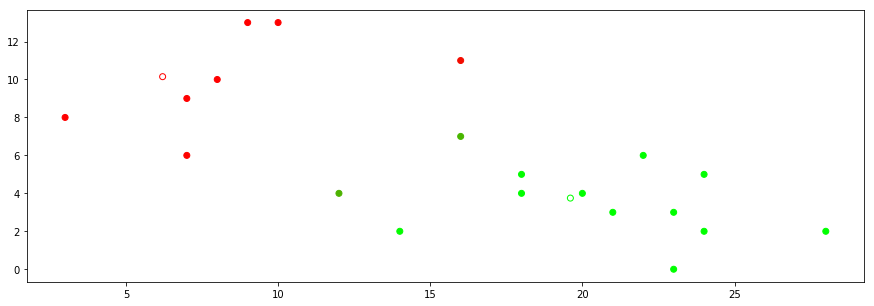

0.627673622833 0.372326377167 [ 20.46442866   3.5869839 ] [ 8.87666876  9.66502788]


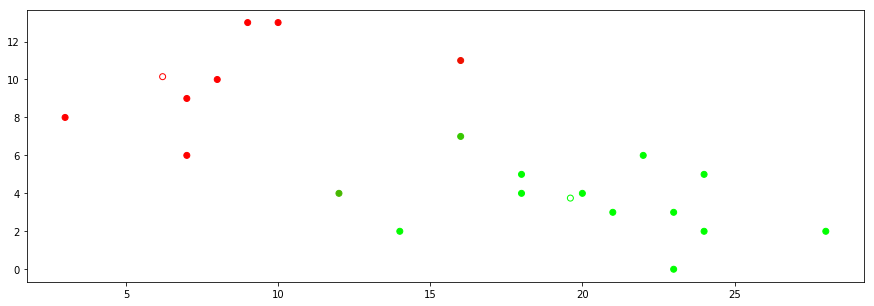

0.630774698892 0.369225301108 [ 20.43537969   3.60125406] [ 8.82897115  9.69169785]


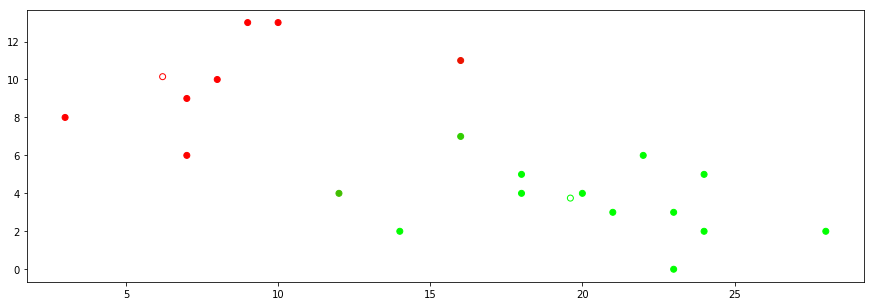

0.63230905565 0.36769094435 [ 20.42094535   3.60837532] [ 8.80536053  9.70486673]


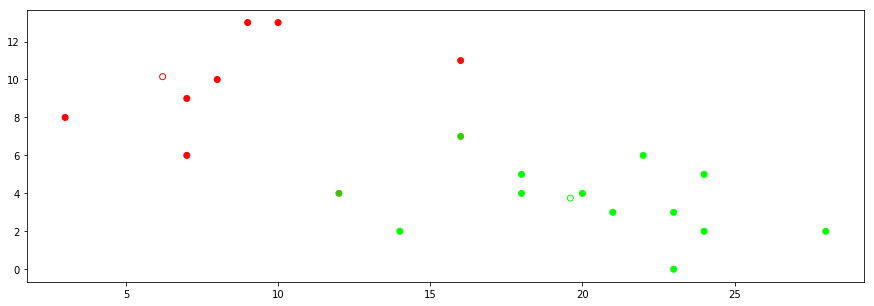

0.633061774167 0.366938225833 [ 20.41389835   3.61194021] [ 8.79369079  9.71122241]


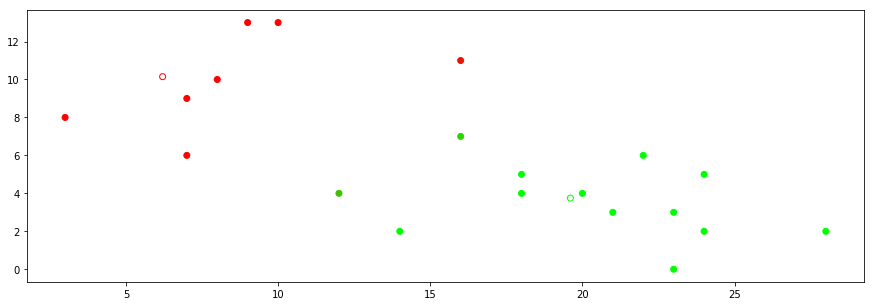

0.633430490269 0.366569509731 [ 20.41045989   3.61371167] [ 8.78794416  9.71429633]


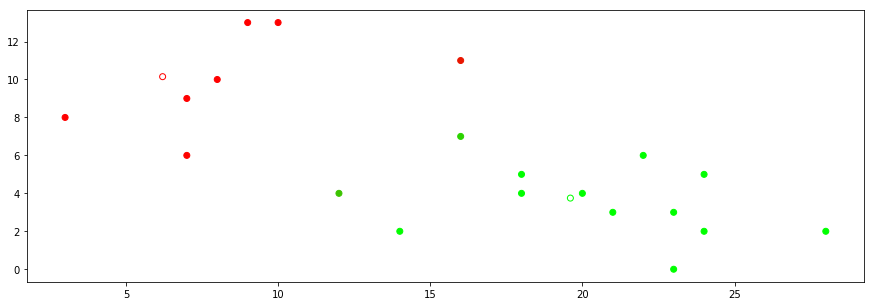

0.63361109817 0.36638890183 [ 20.40877957   3.61458656] [ 8.78512081  9.71579058]


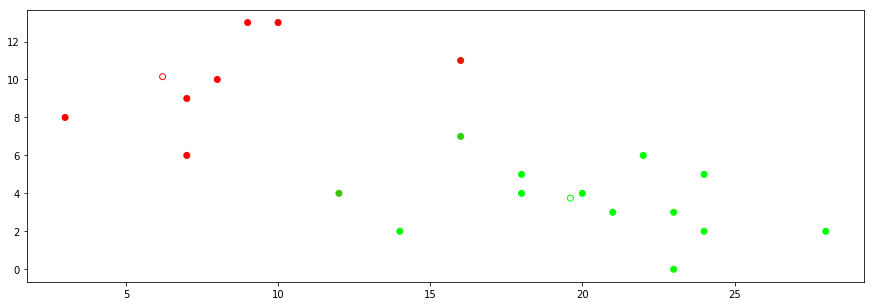

In [13]:
n,numDim = 20,2
data,originalparams = generate_data(n=n,numDim=numDim)
#initParameterspp(numDim)
emparams = softKmeans(data)

In [ ]:
0.63361109817 0.36638890183 [ 20.40877957   3.61458656] [ 8.78512081  9.71579058]
[6.2049389138562194, 10.148872022070595], 0.31586821782668373, [19.605769517860228, 3.7497990619788411], 0.6841317821733163]